<a href="https://colab.research.google.com/github/mingshey/maximacas/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_001_%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%98_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

참고 교재:

Fowles, Analytical Mechanics, 7th edition

번역서: (재개정판) 해석역학, 제7판

## 수치 모의 실험(simulation) 기초(1/3)


## 등속 직선 운동

물체가 일정한 속도로 운동할 때,
$$속도=\dfrac{나중\ 위치 - 처음\ 위치}{시간}.$$


이므로 처음 위치와 속도를 알 때 나중 위치는
$$나중\ 위치 = 처음\ 위치+ 속도\times 시간$$ 과 같이 구할 수 있다.

(즉,

시각 $ t_n $, $t_{n+1}(t_{n+1}= t_n + \Delta t) $일 때의 위치를 각각 $x_{n}$, $x_{n+1}$이라 하고, 속도를 $v$라 하면,
$$v = \dfrac{x_{n+1}-x_{n}}{\Delta t}\space\space(상수)$$

$$ \Rightarrow \space x_{n+1} = x_n + v\cdot\Delta t$$
)

In [ ]:
# 상수 값 정의
v = 10.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

#변수 값 초기화
t = t0
x = x0
t_list = [t]
x_list = [x]

# x값의 변화를 한 단계씩 계산하며 저장한다
for n in range(1, 21):
  t = t + Delta_t
  x = x + v * Delta_t

  t_list.append(t)
  x_list.append(x)

In [ ]:
# 그래프 작성을 위한 패키지
import matplotlib.pyplot as plt

Text(0, 0.5, 'position [m]')

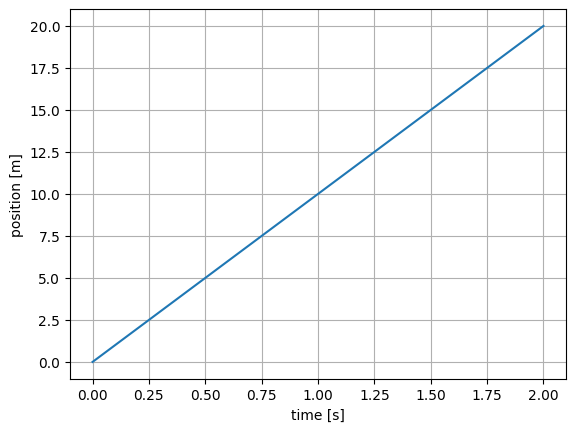

In [ ]:
# 계산하여 저장한 t, x 값을 그래프로 그려본다
plt.grid()
plt.plot(t_list, x_list)
plt.xlabel("time [s]")
plt.ylabel("position [m]")

## 등가속도 직선 운동
- 속도가 일정한 비율로 변하는 운동

### 오일러 방법
- 시시각각 변하는 속도를 매 단계에 반영하여 다음 위치를 구할 때 이용한다.

$가속도 = \dfrac{나중\ 속도 -  처음\ 속도}{시간},$

$현재\ 속도 = \dfrac{나중\ 위치 -  처음\ 위치}{시간}.$

즉,

$a = \dfrac{v_{n+1} - v_{n}}{\Delta t}\space\space(상수),$

$\color{red}{v_n} = \dfrac{x_{n+1}-x_{n}}{\Delta t}\space\space(상수 아님)$

임을 이용하여

$\left\{
\begin{align}
x_{n+1} &= x_n + {\color{red} {v_n}}\cdot\Delta t \\
\\
v_{n+1} &= v_n + a\cdot\Delta t \\
\end{align}
\right.$

와 같이 다음 위치와 속도를 함께 갱신해가며 구한다.
(Euler method)

In [ ]:
# 상수 정의
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

# 변수 값 초기화
t = t0
x = x0
v = v0
t_list = [t]
x_list = [x]
v_list = [v]

# 변화하는 위치와 속도 값을 계산하여 저장
for n in range(1, 21):
  t = t + Delta_t
  x = x + v * Delta_t  # 다음 단계 위치
  v = v + a * Delta_t  # 다음 단계 속도

  t_list.append(t)
  x_list.append(x)
  v_list.append(v)

Text(0, 0.5, 'x [m]')

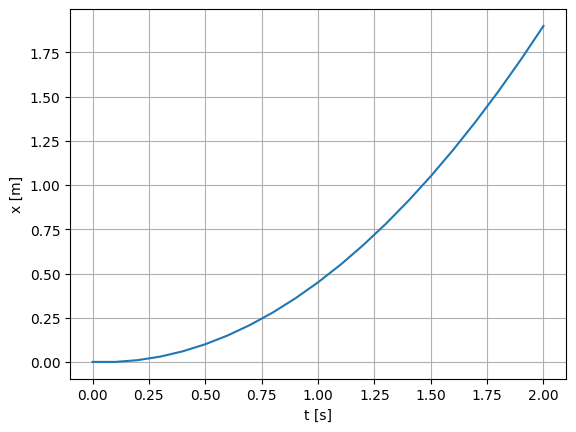

In [ ]:
plt.grid()
plt.plot(t_list, x_list)
plt.xlabel("t [s]")
plt.ylabel("x [m]")

Text(0, 0.5, 'v [m/s]')

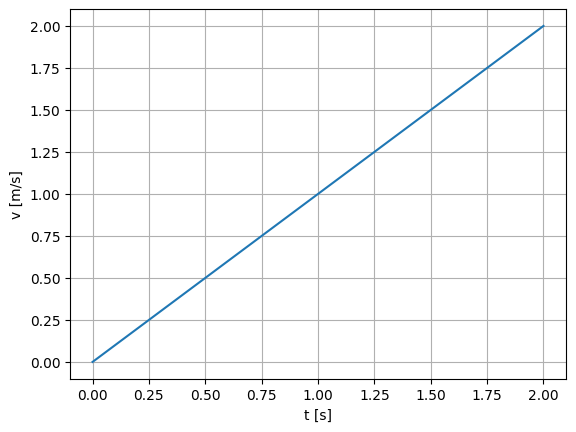

In [ ]:
plt.grid()
plt.plot(t_list, v_list)
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")

* Exact solution과 비교(해석적 풀이)

$v = v_0 + a \cdot t$

$ x = x_0 + v_0 \cdot t + \dfrac{1}{2} a \cdot t^2$

In [ ]:
# 배열(array) 계산을 위한 패키지
# Numpy-examples 노트복 참조
import numpy as np

In [ ]:
ts = np.linspace(0, 2, 21)
vs = v0 + a * ts
xs = x0 + v0 * ts + (1/2) * a * ts**2

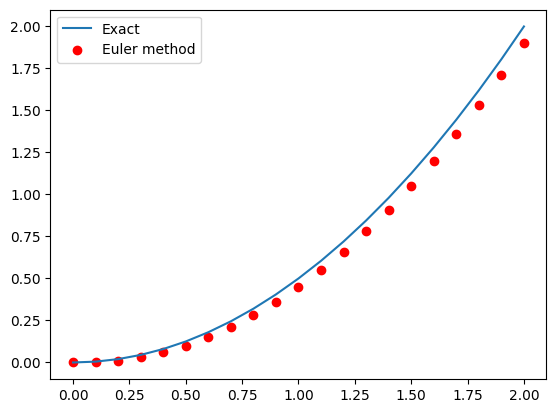

In [ ]:
plt.plot(ts, xs, label="Exact")
plt.scatter(t_list, x_list, c='r', label="Euler method")
plt.legend()

### 오일러-크로머 방법

$\left\{
\begin{align}
{\color{red} {v_{n+1}}} &= v_n + a\cdot\Delta t, \\
\\
x_{n+1} &= x_n + {\color{red} {v_{n+1}}}\cdot\Delta t. \\
\end{align}
\right.$

(Euler-Cromer method)

In [ ]:
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

t = t0
x = x0
v = v0
t_list = [t]
x_list = [x]
v_list = [v]
for n in range(1, 21):
  t = t + Delta_t
  v = v + a * Delta_t  # update v first
  x = x + v * Delta_t  # then update x with updated v

  t_list.append(t)
  x_list.append(x)
  v_list.append(v)

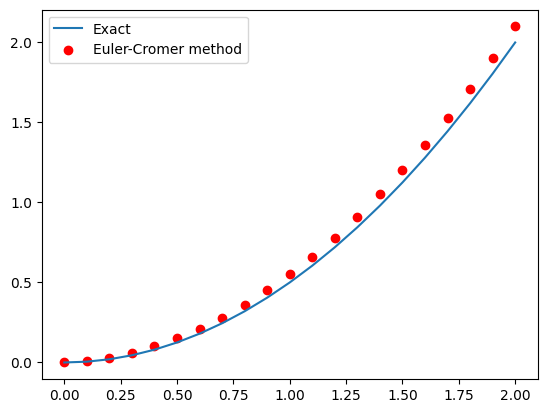

In [ ]:
plt.plot(ts, xs, label="Exact")
plt.scatter(t_list, x_list, c='r', label="Euler-Cromer method")
plt.legend()

### 등가속도 직선 운동(중간점 방법)

등가속도 운동에서
$\Delta x = v_{평균}\cdot\Delta t$

$v_{n+1} = v_{n}+a\cdot\Delta t$이므로

$\begin{align}v_{평균}&=\dfrac{1}{2}\left(v_n + v_{n+1}\right)\\
&=v_n + a\cdot\dfrac{\Delta t}{2}\\
&={\mathrm 중간점\ 속도} (v_{\mathrm {mid}}).
\end{align}
$

$\left\{
\begin{align}
{\color{red} {v_{\rm mid}}} &= v_n + a\cdot\dfrac{\Delta t}{2} \\
x_{n+1} &= x_n + {\color{red} {v_{\rm mid}}}\cdot\Delta t
\\
v_{n+1} &= v_n + a\cdot\Delta t \\
\end{align}
\right.$

(mid-point method)

$\ast$ 중간점 방법은 __등가속도 운동에 한해__ 정확한 결과를 준다.


In [ ]:
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

t = t0
x = x0
v = v0
t_list = [t]
x_list = [x]
v_list = [v]
for n in range(1, 21):
  t = t + Delta_t
  vm = v + a * Delta_t/2  # v_mid
  x = x + vm * Delta_t  # update x with v_mid
  v = v + a * Delta_t

  t_list.append(t)
  x_list.append(x)
  v_list.append(v)

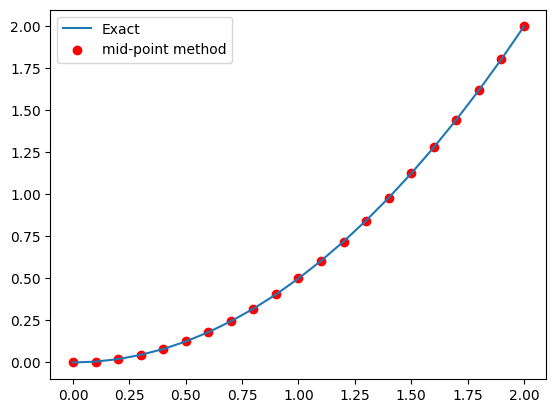

In [ ]:
plt.plot(ts, xs, label="Exact")
plt.scatter(t_list, x_list, c='r', label="mid-point method")
plt.legend()

### 등가속도 직선 운동 : 평균값 방법 또는 호인의 방법(Heun's method)

등가속도 운동에서
$\Delta x = v_{평균}\cdot\Delta t$

$v_{n+1} = v_{n}+a\cdot\Delta t$이므로

$ v_{평균} = \dfrac{1}{2}\left(v_n + v_{n+1}\right) $
을 그대로 이용하여 $t_n$일 때의 속도와 $t_{n+1}$일 때의 속도를 구한 다음, 두 속도의 평균을 이용하여 $x$를 갱신하는 방법이다.

$\left\{
\begin{align}
v_{n+1} &= v_n + a\cdot\Delta t \\
{\color{red} {v_{\rm avg.}}} &= \frac{1}{2}\left(v_n + v_{n+1}\right) \\
x_{n+1} &= x_n + {\color{red} {v_{\rm avg.}}}\cdot\Delta t
\\
\end{align}
\right.$

(Heun's method)

$\ast$ 호인의 방법은  __등가속도 운동에 한해__ 중간점 방법과 동일한 결과를 준다.


In [ ]:
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

t = t0
x = x0
v = v0
t_list = [t]
x_list = [x]
v_list = [v]
for n in range(1, 21):
  t = t + Delta_t
  vnext = v + a * Delta_t  # v_mid
  vavg = (v + vnext) / 2
  x = x + vavg * Delta_t  # update x with v_mid
  v = vnext

  t_list.append(t)
  x_list.append(x)
  v_list.append(v)

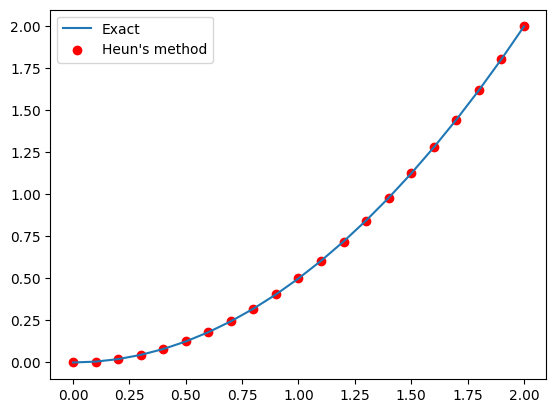

In [ ]:
plt.plot(ts, xs, label="Exact")
plt.scatter(t_list, x_list, c='r', label="Heun's method")
plt.legend()